# Patients exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils as mutil
import sklearn
import sklearn.ensemble
import sklearn.model_selection

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

import tabulate
def print_table(df):
    # Print the stuff
    data = [["Column", "dtype", "# NaN"]]
    for t, c in zip(df.dtypes, df.columns.values):
        if t == 'object':
            print("\x1b[31m", t, "\t", c, "\x1b[0m")
        # print(t, "\t", c)
        data.append([c, t, df[c].isna().sum()])

    table = tabulate.tabulate(data, tablefmt='html')
    display(table)

## Load dataset
* Source https://www.kaggle.com/datasets/mitishaagarwal/patient

In [2]:
patients_ds = pd.read_csv("patient/dataset.csv")
patients_ds = patients_ds.drop(columns=["Unnamed: 83"])

## Layouttitanic_train.head()

In [3]:
patients_ds.head()


,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0


In [4]:
patients_ds.describe(include='all')

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
count,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90318,91688,90379.000000,91601,...,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90051,90051,91713.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,6,2,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,10,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Caucasian,M,NaN,Accident & Emergency,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cardiovascular,Cardiovascular,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,70684,49469,NaN,54060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29999,38816,NaN
mean,65606.079280,65537.131464,105.669262,62.309516,29.185818,0.183736,NaN,NaN,169.641588,NaN,...,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,NaN,NaN,0.086302
std,37795.088538,37811.252183,62.854406,16.775119,8.275142,0.387271,NaN,NaN,10.795378,NaN,...,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,NaN,NaN,0.280811
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,NaN,NaN,137.200000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,32852.000000,32830.000000,47.000000,52.000000,23.641975,0.000000,NaN,NaN,162.500000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
50%,65665.000000,65413.000000,109.000000,65.000000,27.654655,0.000000,NaN,NaN,170.100000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
75%,98342.000000,98298.000000,161.000000,75.000000,32.930206,0.000000,NaN,NaN,177.800000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000


In [5]:
# print("Columns:", patients_ds.columns.values)

# Convert Categorical to numeric
for t, c in zip(patients_ds.dtypes, patients_ds.columns.values):
    if t == 'object':
        print("\x1b[31m", t, "\t", c, "\x1b[0m")
        patients_ds[c] = pd.Categorical(patients_ds[c])
        patients_ds[c] = patients_ds[c].cat.codes

# Convert problematic types
float64_cols = list(patients_ds.select_dtypes(include='float64'))
patients_ds[float64_cols] = patients_ds[float64_cols].astype('float32')

int64_cols = list(patients_ds.select_dtypes(include='int64'))
patients_ds[int64_cols] = patients_ds[int64_cols].astype('int32')

print_table(patients_ds)

 object 	 ethnicity 
 object 	 gender 
 object 	 icu_admit_source 
 object 	 icu_stay_type 
 object 	 icu_type 
 object 	 apache_3j_bodysystem 
 object 	 apache_2_bodysystem 


Column,dtype,# NaN
encounter_id,int32,0
patient_id,int32,0
hospital_id,int32,0
age,float32,4228
bmi,float32,3429
elective_surgery,int32,0
ethnicity,int8,0
gender,int8,0
height,float32,1334
icu_admit_source,int8,0


In [6]:

        
def replace_random(df, c):
    avg = df[c].mean()
    std = df[c].std()
    null_count = df[c].isnull().sum()
    
    null_random_list = np.random.randint(avg - std, avg + std, size=null_count)
    df[c][np.isnan(df[c])] = null_random_list
    
def replace_zero(df, c):
    df[c] = df[c].fillna(0)

# To keep the distribution properties, we replace NaN in these columns by distribution preserving random values
random_replace_columns = [ "age", "bmi", "height","weight" ]
# Having no information on these values can have semantic meaning therefore we set them to 0 (in essence introducing an unknown class)
zero_replace_columns = [
    "apache_2_diagnosis",
    "apache_3j_diagnosis",
    "arf_apache",
    "gcs_eyes_apache",
    "gcs_motor_apache",
    "gcs_unable_apache",
    "gcs_verbal_apache",
    "heart_rate_apache",
    "intubated_apache",
    "map_apache",
    "resprate_apache",
    "temp_apache",
    "ventilated_apache",
    "d1_diasbp_max",
    "d1_diasbp_min",
    "d1_diasbp_noninvasive_max",
    "d1_diasbp_noninvasive_min",
    "d1_heartrate_max",
    "d1_heartrate_min",
    "d1_mbp_max",
    "d1_mbp_min",
    "d1_mbp_noninvasive_max",
    "d1_mbp_noninvasive_min",
    "d1_resprate_max",
    "d1_resprate_min",
    "d1_spo2_max",
    "d1_spo2_min",
    "d1_sysbp_max",
    "d1_sysbp_min",
    "d1_sysbp_noninvasive_max",
    "d1_sysbp_noninvasive_min",
    "d1_temp_max",
    "d1_temp_min",
    "h1_diasbp_max",
    "h1_diasbp_min",
    "h1_diasbp_noninvasive_max",
    "h1_diasbp_noninvasive_min",
    "h1_heartrate_max",
    "h1_heartrate_min",
    "h1_mbp_max",
    "h1_mbp_min",
    "h1_mbp_noninvasive_max",
    "h1_mbp_noninvasive_min",
    "h1_resprate_max",
    "h1_resprate_min",
    "h1_spo2_max",
    "h1_spo2_min",
    "h1_sysbp_max",
    "h1_sysbp_min",
    "h1_sysbp_noninvasive_max",
    "h1_sysbp_noninvasive_min",
    "d1_glucose_max",
    "d1_glucose_min",
    "d1_potassium_max",
    "d1_potassium_min",
    # "apache_4a_hospital_death_prob",
    # "apache_4a_icu_death_prob",
    "aids",
    "cirrhosis",
    "diabetes_mellitus",
    "hepatic_failure",
    "immunosuppression",
    "leukemia",
    "lymphoma",
    "solid_tumor_with_metastasis",
]

# Remove the Appache III score for testing
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4893757/
patients_ds = patients_ds.drop(columns=["apache_4a_hospital_death_prob", "apache_4a_icu_death_prob"])

for c in random_replace_columns:
    replace_random(patients_ds, c)

for c in zero_replace_columns:
    replace_zero(patients_ds, c)

print_table(patients_ds)

C:\Users\flori\AppData\Local\Temp\ipykernel_468\3375241567.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][np.isnan(df[c])] = null_random_list


Column,dtype,# NaN
encounter_id,int32,0
patient_id,int32,0
hospital_id,int32,0
age,float32,0
bmi,float32,0
elective_surgery,int32,0
ethnicity,int8,0
gender,int8,0
height,float32,0
icu_admit_source,int8,0


# Notes:
* maybe to complex, switch to https://www.kaggle.com/datasets/saurabhshahane/in-hospital-mortality-prediction ???

## Train, Test, Validation split

In [7]:
train, val, test = mutil.split_train_val_test(patients_ds, validation_size=0.1, test_size=0.2)

In [8]:
# No missing labels
train['hospital_death'].isna().sum()
train.groupby("hospital_death")['hospital_death'].count()

hospital_death
0    58654
1     5544
Name: hospital_death, dtype: int64

In [9]:

train_x = train.drop(columns=['hospital_death'])
train_y = train['hospital_death']

val_x = val.drop(columns=['hospital_death'])
val_y = val['hospital_death']

test_x = test.drop(columns=['hospital_death'])
test_y = test['hospital_death']

### Hyperparameter search
* Using Grid-Search
* Ref: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [10]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 25, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               # Fixed parameters
               'criterion':'gini', 'class_weight':"balanced"
              }
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = sklearn.ensemble.RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=10, random_state=42, n_jobs = 4)# Fit the random search model
rf_random.fit(train_x, train_y)
# rf_random = GridSearchCV(rf, random_grid, n_jobs=1)
# rf_random.fit(train_x, train_y)



{'n_estimators': [200, 650, 1100, 1550, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 13, 25, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True]}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Model Performance
Average Error: 0.0783 degrees.
Accuracy = -inf%.


NameError: name 'best_random' is not defined

In [22]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = sklearn.ensemble.RandomForestClassifier(n_estimators = 10)

base_model.fit(train_x, train_y)
base_accuracy = evaluate(base_model, test_x, test_y)

random_accuracy = evaluate(rf_random.best_estimator_, test_x, test_y)
print(rf_random.best_params_)


Model Performance
Average Error: 0.0793 degrees.
Accuracy = 92.07%.
Model Performance
Average Error: 0.0741 degrees.
Accuracy = 92.59%.
{'n_estimators': 1550, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 25, 'bootstrap': True}


### Train final model

In [17]:
# Create training dataset
# train_x = train.drop(columns=['hospital_death'])
# train_y = train['hospital_death']
# Train model based on best estimated configuration from previous tests
model = sklearn.ensemble.RandomForestClassifier(n_estimators=1550, min_samples_split=5, min_samples_leaf=2,
                                                max_features='sqrt', max_depth=25, bootstrap=True,
                                                criterion='gini', class_weight="balanced")
model = model.fit(X=train_x, y=train_y)
# Calculate train accuracy
train_accuracy = model.score(X=train_x, y=train_y)
print(f"Train accuracy {train_accuracy}")


Train accuracy 0.9994703884856226


In [18]:
# Create validation dataset
# val_x = val.drop(columns=['hospital_death'])
# val_y = val['hospital_death']
# Calculate train accuracy
val_accuracy = model.score(X=val_x, y=val_y)
print(f"Validation accuracy {val_accuracy}")


Validation accuracy 0.9244439598778892


In [19]:
# Create test dataset
# test_x = test.drop(columns=['hospital_death'])
# test_y = test['hospital_death']
# Calculate train accuracy
test_accuracy = model.score(X=test_x, y=test_y)
print(f"Test accuracy {test_accuracy}")


Test accuracy 0.9236766068800087


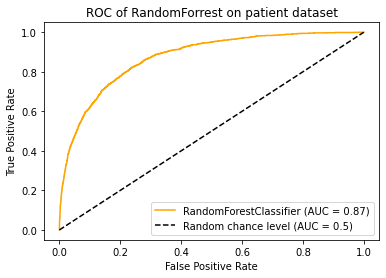

In [20]:
mutil.plot_roc(model, test_x, test_y, title="ROC of RandomForrest on patient dataset")


In [21]:
f1 = mutil.calc_f1(model, test_x, test_y)
print(f"Weighted F1-score = {f1}")

Weighted F1-score = 0.9047034967355443
